In [50]:
# Read in our dataset from "Data_Preprocessing.ipynb" kernel
# This line should work if everything is setup correctly
lr_data = clean_data
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 991384 to 183555
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  float64
 1   Flow Duration      1048575 non-null  float64
 2   TotLen Fwd Pkts    1048575 non-null  float64
 3   Fwd Pkt Len Max    1048575 non-null  float64
 4   Fwd Pkt Len Min    1048575 non-null  float64
 5   Fwd Pkt Len Mean   1048575 non-null  float64
 6   Bwd Pkt Len Max    1048575 non-null  float64
 7   Bwd Pkt Len Min    1048575 non-null  float64
 8   Bwd Pkt Len Mean   1048575 non-null  float64
 9   Flow IAT Mean      1048575 non-null  float64
 10  Bwd IAT Tot        1048575 non-null  float64
 11  Bwd IAT Mean       1048575 non-null  float64
 12  Bwd IAT Max        1048575 non-null  float64
 13  Bwd IAT Min        1048575 non-null  float64
 14  Fwd PSH Flags      1048575 non-null  float64
 15  Pkt Len Var        1048575 n

In [53]:
# Show how many observations are contained within each of the three possible labels
print(lr_data["Label"].value_counts())

0    667626
1    193360
2    187589
Name: Label, dtype: int64


In [56]:
X = lr_data
y = lr_data["Label"].astype(int)
X = X.drop(columns="Label")

In [59]:
str_feats = []
for column_name, column_value in X.items():
    if type(column_value[1]) == str:
        str_feats.append(column_name)
        
num_feats = X.columns.difference(str_feats)
df_feats = X[num_feats]

<Axes: title={'center': 'Pearson Correlation of Features'}>

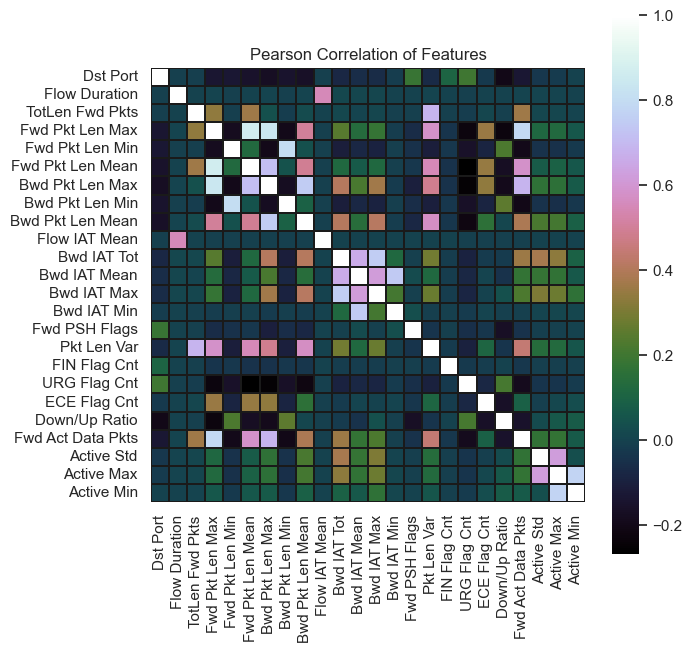

In [62]:
f, ax = plt.subplots(figsize=(7, 7))
plt.title("Pearson Correlation of Features")
sns.heatmap(df_feats.astype(float).corr(), linewidths=0.05, vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=False)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(891288, 24) (157287, 24) (891288,) (157287,)


In [66]:
model = make_pipeline(StandardScaler(), LogisticRegression())

set_config(display='diagram')
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [68]:
print("Train:", len(X_train), "Test:", len(X_test))
print(y_train)

Train: 891288 Test: 157287
776396     0
342013     2
849537     0
675917     0
131559     1
          ..
109481     1
584212     0
434763     0
1036974    0
869806     0
Name: Label, Length: 891288, dtype: int64


In [70]:
# C is the standardization parameter that penalizes extreme values
log_reg = LogisticRegression(random_state=42, C=1.5, fit_intercept=True, max_iter=400).fit(X_train, y_train)
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 7.63740182e+01 -2.12678805e-01  3.79971377e+00 -4.17342543e+00
   1.36062331e+01  1.15044614e+01  2.26289510e+00  2.24163077e+01
   5.59937543e+01  4.94179244e-01  4.22440945e+01  9.71338908e+00
   2.03231871e+01  5.81900028e+00  4.62683068e+00  4.28888285e+00
   5.70912929e+00 -1.87690911e-01  2.90245463e+00 -1.46126127e+02
  -2.32970704e+01  6.69084147e-01  6.72785220e+00  6.06542975e+00]
 [-3.95864816e+01  2.20376382e-01 -1.90442532e-02 -1.01138768e+00
  -1.33514786e+01 -3.11597410e+00 -3.12047480e+01 -2.20739632e+01
  -1.26808492e+01 -4.80957938e-01 -2.71852787e+01 -8.09681178e+00
  -1.21759305e+01 -5.58075220e+00 -3.84080401e+00 -1.43593718e-02
  -5.63783524e+00 -8.30933757e+00 -8.17143813e-02  1.83181463e+02
  -8.44634966e-01 -6.39495374e-01 -5.75467436e+00 -5.11719392e+00]
 [-3.67875367e+01 -7.69757686e-03 -3.78066951e+00  5.18481311e+00
  -2.54754469e-01 -8.38848726e+00  2.89418529e+01 -3.42344440e-01
  -4.33129051e+01 -1.32213062e-02 -1.50588158e+01 -1.61657730e+00
  -8.147

In [72]:
y_pred = log_reg.predict(X_test)

In [74]:
log_reg.score(X_test, y_test)

0.9953206558711146

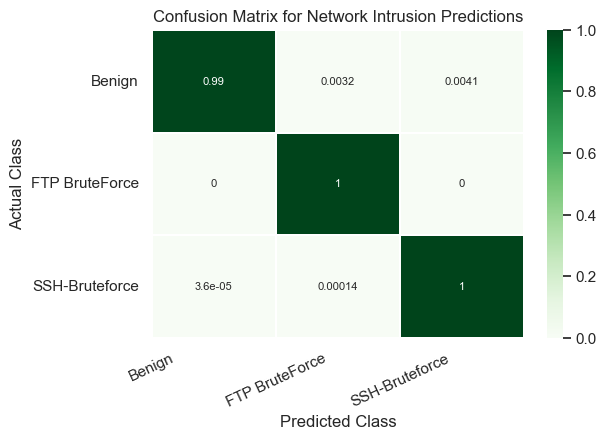

In [75]:
labels = ["Benign", "FTP BruteForce", "SSH-Bruteforce"]
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(6, 4))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, annot_kws={'size':8}, cmap=plt.cm.Greens, linewidths=0.2)

tick_marks = np.arange(len(labels))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, labels, rotation=25)
plt.yticks(tick_marks2, labels, rotation=0)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Network Intrusion Predictions')
plt.show()

In [76]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Model Performance")
print("MAE: {}" .format(mae))
print("MSE: {}" .format(mse))
# The closer R2 is to 1, the better the model fit
print("R2: {}" .format(r2))

Model Performance
MAE: 0.0073178330059064005
MSE: 0.012594810759948375
R2: 0.979217277904928


In [77]:
print(y_test.iloc[0:5], y_pred[0:5])

461558    0
547334    0
9625      1
316737    2
361697    2
Name: Label, dtype: int64 [0 0 1 2 2]


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    100144
           1       0.99      1.00      0.99     29004
           2       0.99      1.00      0.99     28139

    accuracy                           1.00    157287
   macro avg       0.99      1.00      0.99    157287
weighted avg       1.00      1.00      1.00    157287

